In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
dataset = pd.read_csv('bihar_river_flood_data_with_region_year_month.csv')
dataset.head()

,year_month,River Name,Water Level (m),Rainfall Level (mm),Part of Bihar Affected,Flood
0,2018-01,Ganga,23.73,119.5,North Bihar,0
1,2018-01,Phalgu,11.90,130.3,South Bihar,0
2,2018-01,Sone,18.10,222.8,South Bihar,0
3,2018-01,Bagmati,15.32,40.4,North Bihar,0
4,2018-01,Mahananda,18.02,33.5,East Bihar,0


In [4]:
dataset.fillna(dataset['Part of Bihar Affected'].mode()[0])

,year_month,River Name,Water Level (m),Rainfall Level (mm),Part of Bihar Affected,Flood
0,2018-01,Ganga,23.73,119.5,North Bihar,0
1,2018-01,Phalgu,11.90,130.3,South Bihar,0
2,2018-01,Sone,18.10,222.8,South Bihar,0
3,2018-01,Bagmati,15.32,40.4,North Bihar,0
4,2018-01,Mahananda,18.02,33.5,East Bihar,0
...,...,...,...,...,...,...
4195,2023-12,Kamla Balan,13.95,35.2,North Bihar,0
4196,2023-12,Gandak,19.59,13.8,North Bihar,0
4197,2023-12,Punpun,15.42,209.9,Central Bihar,0
4198,2023-12,Kosi,22.46,10.0,North Bihar,0


In [5]:
OHE = OneHotEncoder(drop = 'first')
dataset['Flood']= OHE.fit_transform(dataset[['Flood']]).toarray()

In [6]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['River Name', 'Part of Bihar Affected']

label_mappings = {}

for column in columns_to_encode:
    le = LabelEncoder()  
    dataset[column] = le.fit_transform(dataset[column])
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))


print("Label Encoding Mappings:")
for column, mapping in label_mappings.items():
    print(f"{column}: {mapping}")

Label Encoding Mappings:
River Name: {'Bagmati': 0, 'Burhi Gandak': 1, 'Gandak': 2, 'Ganga': 3, 'Kamla Balan': 4, 'Kosi': 5, 'Mahananda': 6, 'Phalgu': 7, 'Punpun': 8, 'Sone': 9}
Part of Bihar Affected: {'Central Bihar': 0, 'East Bihar': 1, 'North Bihar': 2, 'South Bihar': 3, 'West Bihar': 4}


In [7]:
dataset.head()

,year_month,River Name,Water Level (m),Rainfall Level (mm),Part of Bihar Affected,Flood
0,2018-01,3,23.73,119.5,2,0.0
1,2018-01,7,11.90,130.3,3,0.0
2,2018-01,9,18.10,222.8,3,0.0
3,2018-01,0,15.32,40.4,2,0.0
4,2018-01,6,18.02,33.5,1,0.0


In [8]:
new_dataset = dataset.drop(columns = ['year_month'])

In [9]:
new_dataset.head()

,River Name,Water Level (m),Rainfall Level (mm),Part of Bihar Affected,Flood
0,3,23.73,119.5,2,0.0
1,7,11.90,130.3,3,0.0
2,9,18.10,222.8,3,0.0
3,0,15.32,40.4,2,0.0
4,6,18.02,33.5,1,0.0


In [10]:
new_dataset['Flood'].value_counts()

Flood
0.0    4019
1.0     181
Name: count, dtype: int64

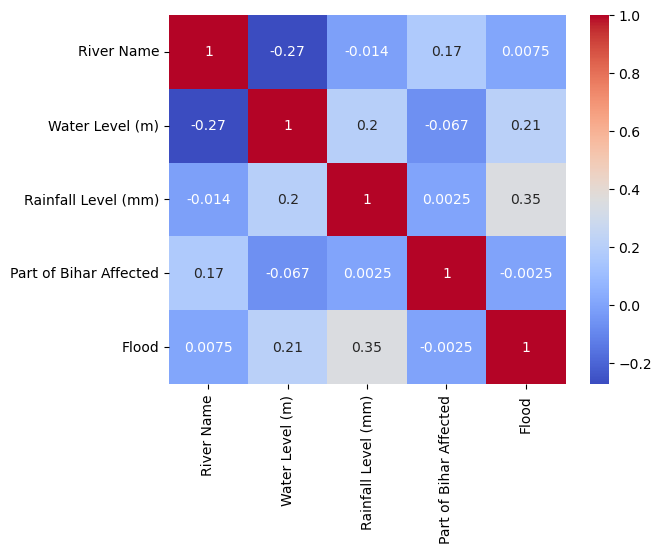

In [11]:
sns.heatmap(data=new_dataset.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [12]:
from imblearn.over_sampling import RandomOverSampler

x = new_dataset.iloc[:, :-1]  
Y = new_dataset['Flood']  

ru = RandomOverSampler()
x_resampled, Y_resampled = ru.fit_resample(x, Y)

new_dataset_resampled = x_resampled.copy()
new_dataset_resampled['Flood'] = Y_resampled

In [13]:
new_dataset_resampled['Flood'].value_counts()


Flood
0.0    4019
1.0    4019
Name: count, dtype: int64

In [14]:
new_dataset_resampled.head()

,River Name,Water Level (m),Rainfall Level (mm),Part of Bihar Affected,Flood
0,3,23.73,119.5,2,0.0
1,7,11.90,130.3,3,0.0
2,9,18.10,222.8,3,0.0
3,0,15.32,40.4,2,0.0
4,6,18.02,33.5,1,0.0


In [15]:
new_dataset_resampled['Part of Bihar Affected'].value_counts()

Part of Bihar Affected
2    3923
3    1654
1     974
0     936
4     551
Name: count, dtype: int64

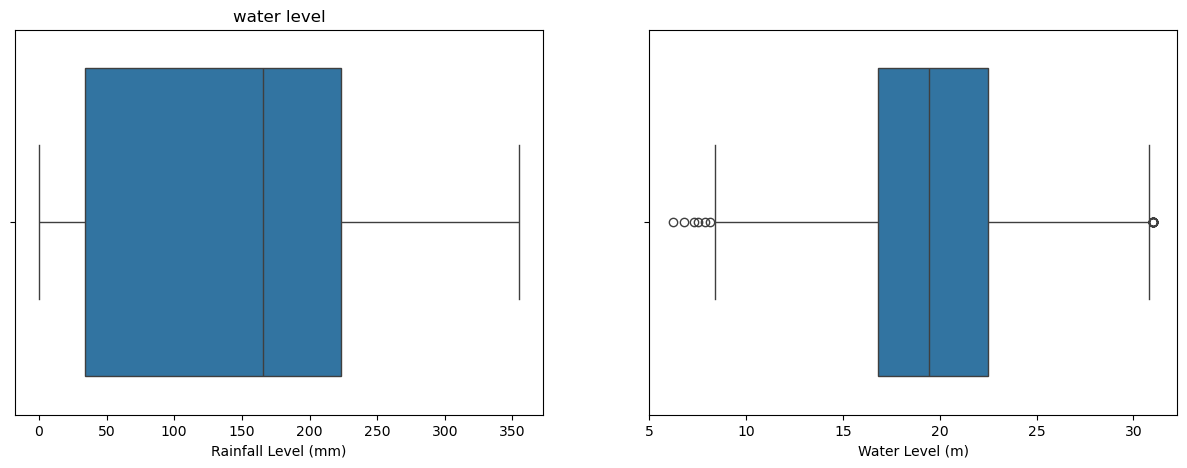

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x = 'Rainfall Level (mm)', data = new_dataset_resampled)
plt.title('water level')
plt.subplot(1, 2, 2)
sns.boxplot(x = 'Water Level (m)', data = new_dataset_resampled)
plt.show()

In [17]:
new_dataset_resampled.dtypes

River Name                  int32
Water Level (m)           float64
Rainfall Level (mm)       float64
Part of Bihar Affected      int32
Flood                     float64
dtype: object

In [18]:
X = new_dataset_resampled[['River Name', 'Water Level (m)', 'Rainfall Level (mm)']]
y = new_dataset_resampled[['Flood', 'Part of Bihar Affected']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=46)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV


In [24]:
rf_model = RandomForestClassifier(random_state=45)

multi_rf_model = MultiOutputClassifier(rf_model)

# Hyperparameter
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(multi_rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_

model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=50,
                                                       random_state=45))

In [25]:
y_pred = model.predict(X_test)

In [26]:
flood_accuracy = accuracy_score(y_test['Flood'], y_pred[:, 0])
part_affected_accuracy = accuracy_score(y_test['Part of Bihar Affected'], y_pred[:, 1])

print(f"Flood Prediction Accuracy: {flood_accuracy * 100:.2f}%")
print(f"Part of Bihar Affected Prediction Accuracy: {part_affected_accuracy * 100:.2f}%")

# Classification reports
print("\nFlood Classification Report:\n", classification_report(y_test['Flood'], y_pred[:, 0]))
print("\nPart of Bihar Affected Classification Report:\n", classification_report(y_test['Part of Bihar Affected'], y_pred[:, 1]))

Flood Prediction Accuracy: 99.94%
Part of Bihar Affected Prediction Accuracy: 84.95%

Flood Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       784
         1.0       1.00      1.00      1.00       824

    accuracy                           1.00      1608
   macro avg       1.00      1.00      1.00      1608
weighted avg       1.00      1.00      1.00      1608


Part of Bihar Affected Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       185
           1       0.78      0.68      0.73       194
           2       0.88      0.92      0.90       777
           3       0.84      0.93      0.88       340
           4       0.80      0.66      0.73       112

    accuracy                           0.85      1608
   macro avg       0.82      0.78      0.80      1608
weighted avg       0.85      0.85      0.85      1608



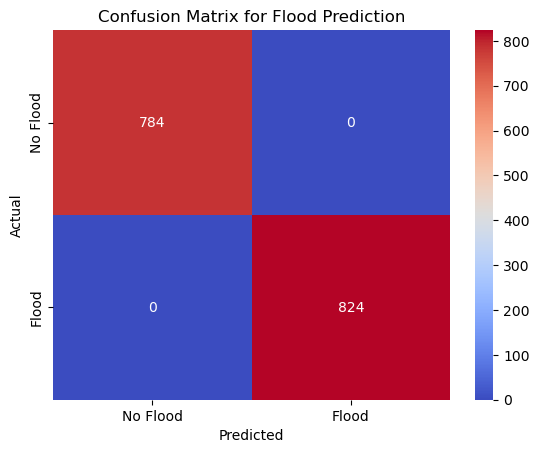

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test['Flood'], y_pred[:, 0])

# Plot heatmap for confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Confusion Matrix for Flood Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

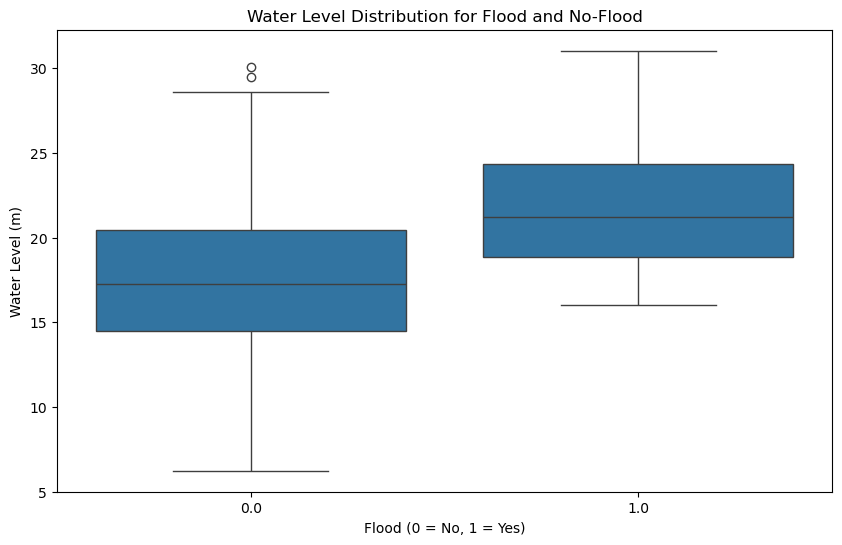

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_dataset_resampled['Flood'], y=new_dataset_resampled['Water Level (m)'])

plt.title('Water Level Distribution for Flood and No-Flood')
plt.xlabel('Flood (0 = No, 1 = Yes)')
plt.ylabel('Water Level (m)')
plt.show()

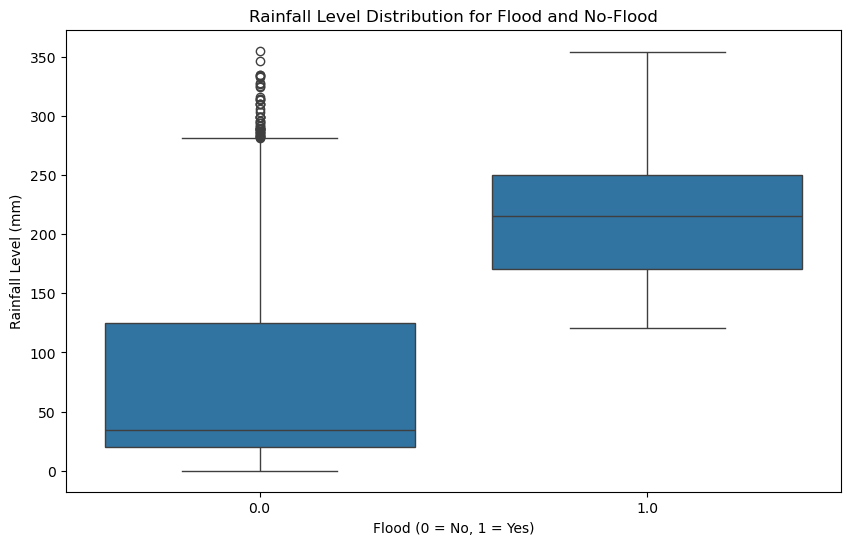

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_dataset_resampled['Flood'], y=new_dataset_resampled['Rainfall Level (mm)'])

plt.title('Rainfall Level Distribution for Flood and No-Flood')
plt.xlabel('Flood (0 = No, 1 = Yes)')
plt.ylabel('Rainfall Level (mm)')
plt.show()

In [38]:
river_mapping = {
    "Bagmati": 0,
    "Burhi Gandak": 1,
    "Gandak": 2,
    "Ganga": 3,
    "Kamla Balan": 4,
    "Kosi": 5,
    "Mahananda": 6,
    "Phalgu": 7,
    "Punpun": 8,
   " Sone": 9
}

In [39]:
try:
    river_name = int(input(
        "Enter Allocated Number to the river:\n"
        "0: Bagmati\n"
        "1: Burhi Gandak\n"
        "2: Gandak\n"
        "3: Ganga\n"
        "4: Kamla Balan\n"
        "5: Kosi\n"
        "6: Mahananda\n"
        "7: Phalgu\n"
        "8: Punpun\n"
        "9: Sone\n"
        "Your choice: "
    ))
    water_level = float(input("Enter Water Level (in meters): "))
    rainfall_level = float(input("Enter Rainfall Level (in mm): "))

    user_data = [[river_name, water_level, rainfall_level]]
    user_prediction = model.predict(user_data)

    flood_prediction = "Yes" if user_prediction[0][0] == 1 else "No"
    part_affected_prediction = int(user_prediction[0][1])

    # Decode the river name and part affected 
    decoded_river_name = list(label_mappings['River Name'].keys())[
        list(label_mappings['River Name'].values()).index(river_name)
    ]
    decoded_part_affected = list(label_mappings['Part of Bihar Affected'].keys())[
        list(label_mappings['Part of Bihar Affected'].values()).index(part_affected_prediction)
    ]

    print("Flood Prediction:", flood_prediction)
    print("River Name:", decoded_river_name)

    if flood_prediction == "Yes":
        print("Expected Affected Part of Bihar:", decoded_part_affected)
    else:
        print("NO Flood Expected")
except ValueError:
    print("Invalid input. Please enter numeric values for River Name, Water Level, and Rainfall Level.")

Flood Prediction: Yes
River Name: Sone
Expected Affected Part of Bihar: South Bihar


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
pickle.dump(model, open('flood.pkl', 'wb'))